In [34]:

import talib
import matplotlib.pyplot as plt
import pandas as pd
import datetime
df=pd.read_csv('EUR_STOCK_DATA.csv')
df.head()

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.23492,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.23521,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.23435,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.23491,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.23680,1.238700,1.236285,1.238205


In [35]:
print(type(df["Gmt time"].iloc[0]))

<class 'str'>


In [36]:
# BETWEEN OPEN AND CLOSE
# If Datetime is in string only the 1st that is day was being comapred
df['Gmt time']=pd.to_datetime(df['Gmt time'])

def return_data_for_period():
  date1=input("Enter first Date for time period format D.M.Y :- ")
  date2=input("Enter Second Date for time period format D.M.Y :- ")
  # 0th index has date 1st has Month 2nd has year
  # 2012-12-17 04:00:00 .datetime()
  # 2012-12-17 .date()
  date1=date1.split(".")
  date2=date2.split(".")
  date1=datetime.datetime(year=int(date1[2]),month=int(date1[1]),day=int(date1[0]))
  date2=datetime.datetime(year=int(date2[2]),month=int(date2[1]),day=int(date2[0]))
  date_filt1=df[df["Gmt time"]>date1]
  return date_filt1[date_filt1["Gmt time"]<date2]

Enter first Date for time period format D.M.Y :- 14.12.2012
Enter Second Date for time period format D.M.Y :- 30.12.2012


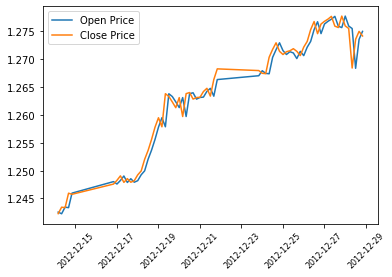

In [37]:
open_Close_filtered_Data=return_data_for_period()
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['Open'],label="Open Price")
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['Close'],label="Close Price")
plt.xticks(rotation=45,fontsize=8)
plt.legend()
plt.show()

In [38]:
# Check which months over the year had highest Volume
# caluclate mean volume for each month each year
# 1 data frames that has 12 jan,feb,march,april,may,june,july..... and rows will be number of year

In [39]:
# Check which months over the year had highest Volume

df['Month'] = df['Gmt time'].dt.month  #Extract month from 'Gmt time'
print(df['Month'])

monthly_volume = df.groupby('Month')['Volume'].mean()  #total volume for each month

print(monthly_volume)

highest_volume_months = monthly_volume[monthly_volume == monthly_volume.max()]
#highest_volume_months=monthly_volume.max()
print(highest_volume_months)

0        12
1        12
2        12
3        12
4        12
         ..
12885    11
12886    11
12887    11
12888    11
12889    11
Name: Month, Length: 12890, dtype: int64
Month
1     29711.531764
2     29080.248428
3     31942.057793
4     27488.829369
5     27571.194722
6     29604.812321
7     30358.712465
8     30703.830338
9     31694.943921
10    28434.380862
11    26598.877652
12    24932.630240
Name: Volume, dtype: float64
Month
3    31942.057793
Name: Volume, dtype: float64


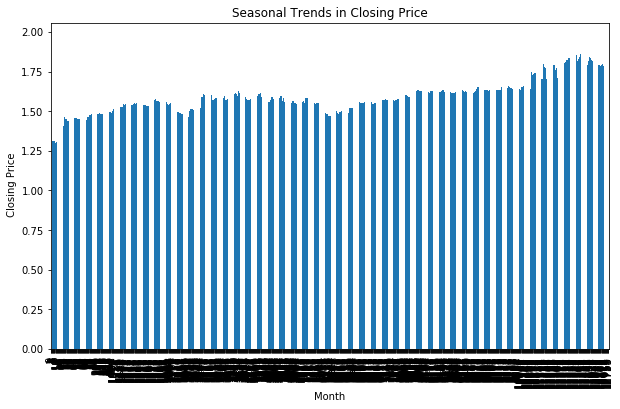

In [40]:
#See Seasonal Trends in Closing Price and Find out the months for high Volitality

df['Month'] = df['Gmt time'].dt.month

monthly_closing_price = df.groupby('Month')['Close']

monthly_closing_price.plot.bar(x='Month', y='Close', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel(' Closing Price')
plt.title('Seasonal Trends in Closing Price')
plt.show()

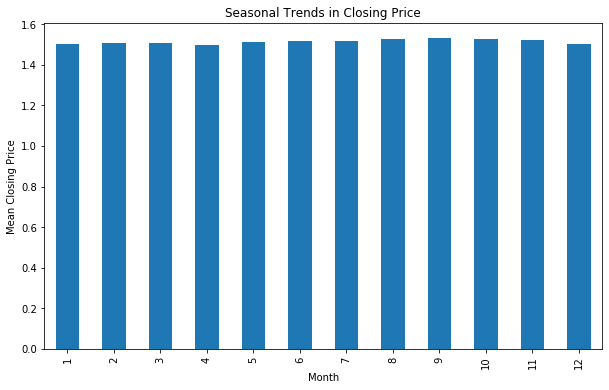

In [41]:
df['Month'] = df['Gmt time'].dt.month

monthly_mean_closing_price = df.groupby('Month')['Close'].mean()

monthly_mean_closing_price.plot.bar(x='Month', y='Mean Closing Price', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Mean Closing Price')
plt.title('Seasonal Trends in Closing Price')
plt.show()

In [42]:
monthly_volatility = df.groupby('Month')['Close'].std()
print(monthly_volatility)
high_volatility_months = monthly_volatility[monthly_volatility > monthly_volatility.mean()]
print(high_volatility_months)
print("Months with high volatility:")
for month in high_volatility_months.index:
    print(month)

Month
1     0.107728
2     0.106981
3     0.141377
4     0.117578
5     0.101301
6     0.086792
7     0.085486
8     0.088933
9     0.088107
10    0.092955
11    0.084776
12    0.103616
Name: Close, dtype: float64
Month
1     0.107728
2     0.106981
3     0.141377
4     0.117578
5     0.101301
12    0.103616
Name: Close, dtype: float64
Months with high volatility:
1
2
3
4
5
12


In [43]:
# Simple moving Average

# Cumulative Moving Average

# Explonentital Movie Average

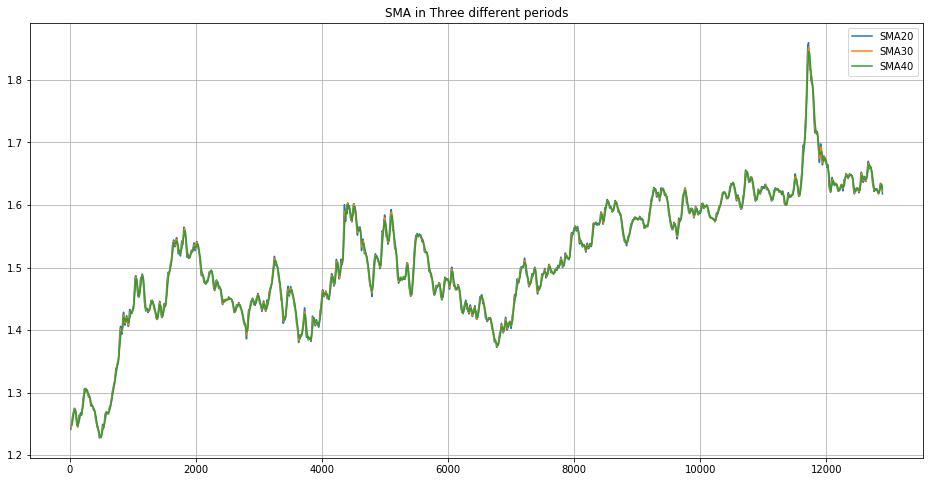

In [44]:
# Simple moving Average


df['SMA20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA30'] = talib.SMA(df['Close'], timeperiod=30)
df['SMA40'] = talib.SMA(df['Close'], timeperiod=40)
plt.figure(figsize=(16, 8))
plt.plot(df['SMA20'], label='SMA20')
plt.plot(df['SMA30'], label='SMA30')
plt.plot(df['SMA40'], label='SMA40')
# plt.plot(stock_data['Close'], label='Close')
plt.legend()
plt.grid(True)
plt.title('SMA in Three different periods')
plt.show()

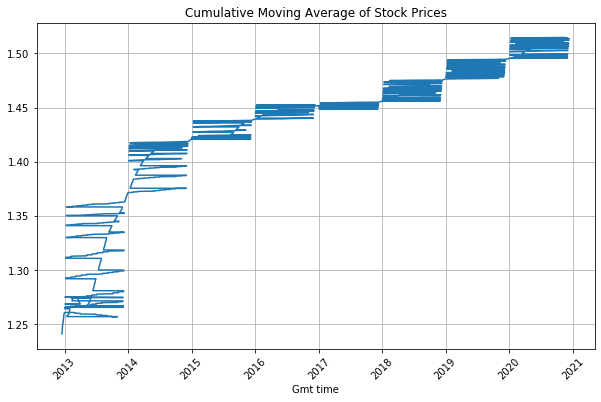

In [45]:
#CUMULATIVE MOVING AVARAGE
df['CMA20'] =df['Close'].expanding(min_periods=20).mean()
plt.figure(figsize=(10, 6))
plt.plot(df['Gmt time'], df['CMA20'])
plt.xlabel('Gmt time')
plt.title('Cumulative Moving Average of Stock Prices')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

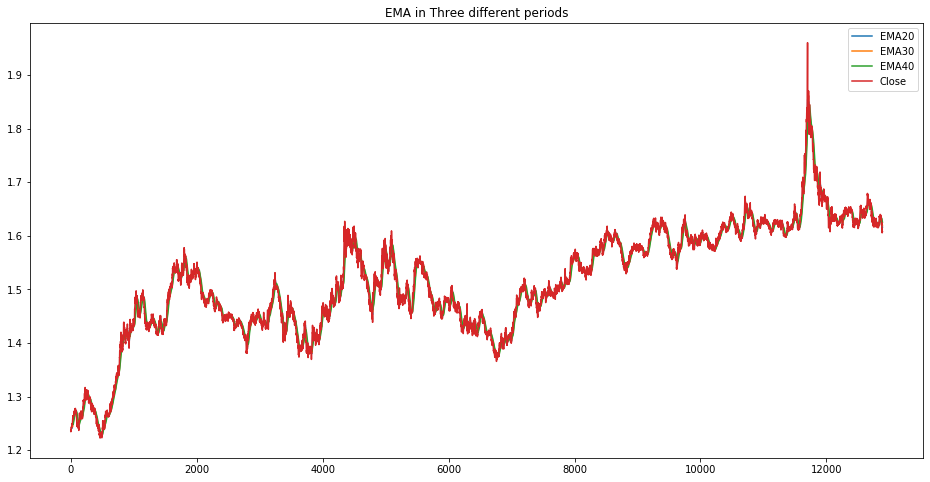

In [46]:
#EXPONENTIAL MOVING AVERAGE

df['EMA20'] = talib.EMA(df['Close'], timeperiod=20)
df['EMA30'] = talib.EMA(df['Close'], timeperiod=30)
df['EMA40'] = talib.EMA(df['Close'], timeperiod=40)
plt.figure(figsize=(16, 8))
plt.plot(df['EMA20'], label='EMA20')
plt.plot(df['EMA30'], label='EMA30')
plt.plot(df['SMA40'], label='EMA40')
plt.plot(df['Close'], label='Close')
plt.legend()
plt.title('EMA in Three different periods')
plt.show()

In [47]:
'''Calculate the RSI
The RSI calculation follows a straightforward formula. RS, or Relative Strength, is the average of upward price changes in
a chosen n periods, divided by the average of downward price changes over those n periods.

Where: RS = average of upward price changes / average of downward price changes

All these calculations can be handled in Python with one line of code. In this exercise, you will do your first RSI 
calculation using historical daily price data of the Google stock.'''

'Calculate the RSI\nThe RSI calculation follows a straightforward formula. RS, or Relative Strength, is the average of upward price changes in\na chosen n periods, divided by the average of downward price changes over those n periods.\n\nWhere: RS = average of upward price changes / average of downward price changes\n\nAll these calculations can be handled in Python with one line of code. In this exercise, you will do your first RSI \ncalculation using historical daily price data of the Google stock.'

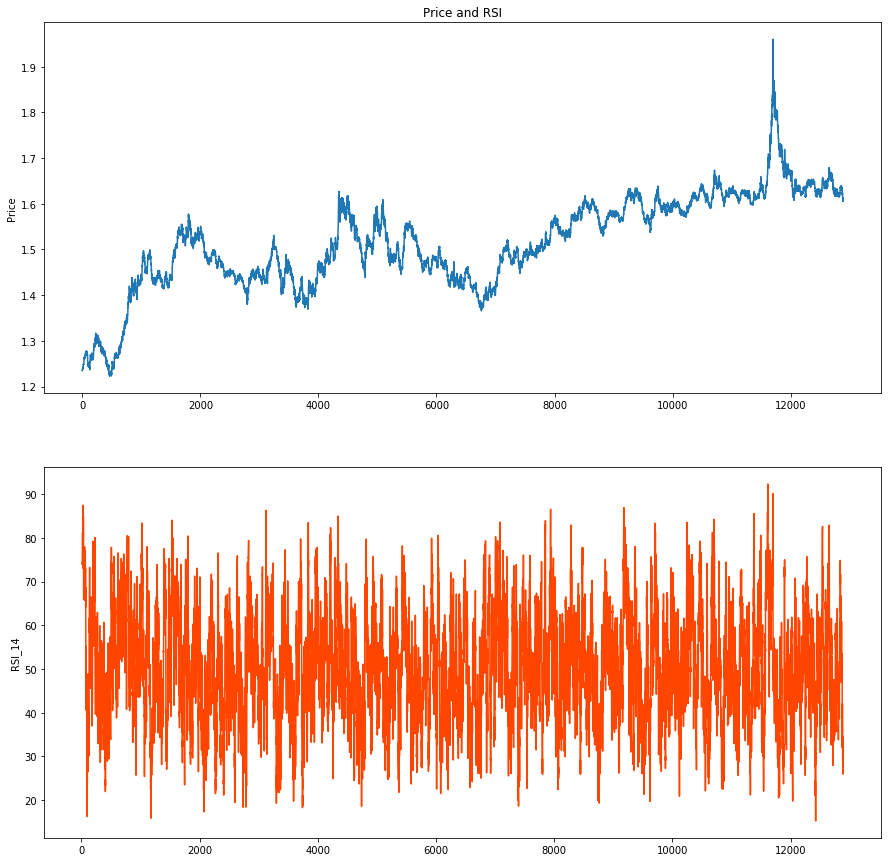

In [48]:
# RSI

df['RSI_14'] = talib.RSI(df['Close'],timeperiod = 14)

# Calculate RSI with a time period of 30
df['RSI_30'] = talib.RSI(df['Close'], timeperiod = 30)
df['RSI_40'] = talib.RSI(df['Close'], timeperiod = 40)

# Print the last five rows
#print(df.tail())

fig, (ax1, ax2) = plt.subplots(2, figsize=(15,15))
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(df['Close'])
ax2.set_ylabel('RSI_14')
ax2.plot(df['RSI_14'], color='orangered')

ax1.set_title('Price and RSI')
plt.show()

In [49]:
#Volatility Indicators: Bollinger Bands

In [50]:
'''Bollinger Bands are envelopes plotted above and below a simple moving average of the price. Because the distance of the 
bands is based on the standard deviation,they adjust to volatility swings in the underlying price.To better
understand the impact of standard deviation specification on Bollinger bands,\nyou will implement and plot two sets of
Bollinger Bands on the same dataset.'''

'Bollinger Bands are envelopes plotted above and below a simple moving average of the price. Because the distance of the \nbands is based on the standard deviation,they adjust to volatility swings in the underlying price.To better\nunderstand the impact of standard deviation specification on Bollinger bands,\nyou will implement and plot two sets of\nBollinger Bands on the same dataset.'

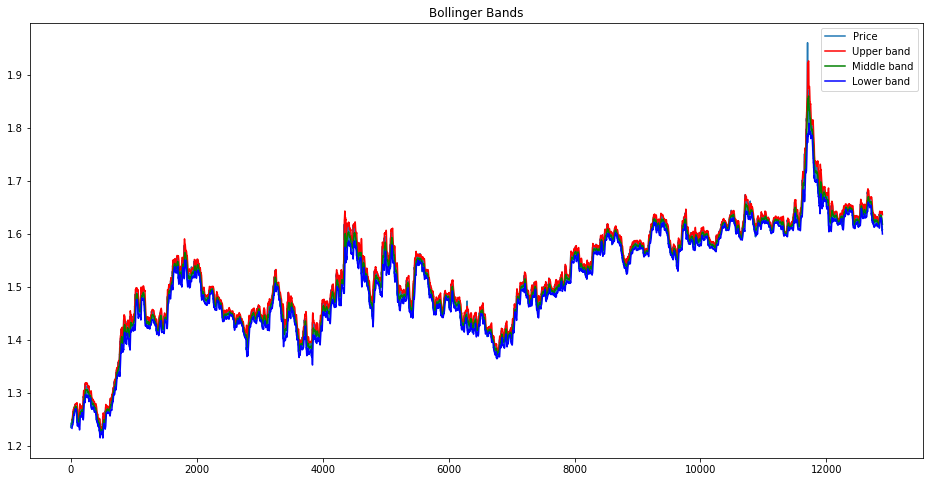

In [51]:
#Bollinger Bands 

upper, mid, lower = talib.BBANDS(df['Close'],
                                 nbdevup=2,
                                 nbdevdn=2,
                                 timeperiod=20)

plt.figure(figsize=(16, 8))

# Plot the Bollinger Bands 
plt.plot(df['Close'], label='Price')
plt.plot(upper, color='Red' , label='Upper band')
plt.plot(mid, color='Green', label='Middle band')
plt.plot(lower, color='blue', label='Lower band')

# Customize and show the plot
plt.title('Bollinger Bands')
plt.legend()
plt.show()

In [56]:

# !pip install TA_Lib-0.4.19-cp37-cp37m-win_amd64.whl

In [57]:
df['Label']=0

In [58]:
# labels based on the next closing price
for i in range(len(df)-1):
    if df['Close'].iloc[i+1] > df['Close'].iloc[i]:
        df.loc[i, 'Label'] = 1

In [61]:
df.head(8)

,Gmt time,Volume,Open,High,Low,Close,Month,SMA20,SMA30,SMA40,CMA20,EMA20,EMA30,EMA40,RSI_14,RSI_30,RSI_40,Label
0,2012-12-12 00:00:00,11011.3902,1.234920,1.235890,1.233830,1.235200,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2012-12-12 04:00:00,13271.5599,1.235210,1.235510,1.233860,1.234340,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2012-12-12 08:00:00,26716.2305,1.234350,1.236370,1.233305,1.234905,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2012-12-12 12:00:00,28430.1602,1.234910,1.237285,1.234850,1.236810,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2012-12-12 16:00:00,33124.1904,1.236800,1.238700,1.236285,1.238205,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,2012-12-12 20:00:00,12511.1400,1.238205,1.239455,1.237810,1.238975,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,2012-12-13 00:00:00,13014.5603,1.238950,1.239780,1.237800,1.239665,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,2012-12-13 04:00:00,13104.6699,1.239685,1.240975,1.239360,1.239555,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [62]:
df=df.fillna(0)

In [63]:
df.head(8)

,Gmt time,Volume,Open,High,Low,Close,Month,SMA20,SMA30,SMA40,CMA20,EMA20,EMA30,EMA40,RSI_14,RSI_30,RSI_40,Label
0,2012-12-12 00:00:00,11011.3902,1.234920,1.235890,1.233830,1.235200,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2012-12-12 04:00:00,13271.5599,1.235210,1.235510,1.233860,1.234340,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2012-12-12 08:00:00,26716.2305,1.234350,1.236370,1.233305,1.234905,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2012-12-12 12:00:00,28430.1602,1.234910,1.237285,1.234850,1.236810,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2012-12-12 16:00:00,33124.1904,1.236800,1.238700,1.236285,1.238205,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,2012-12-12 20:00:00,12511.1400,1.238205,1.239455,1.237810,1.238975,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,2012-12-13 00:00:00,13014.5603,1.238950,1.239780,1.237800,1.239665,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,2012-12-13 04:00:00,13104.6699,1.239685,1.240975,1.239360,1.239555,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [64]:
#checking for NaN value

df.isna().sum()

Gmt time    0
Volume      0
Open        0
High        0
Low         0
Close       0
Month       0
SMA20       0
SMA30       0
SMA40       0
CMA20       0
EMA20       0
EMA30       0
EMA40       0
RSI_14      0
RSI_30      0
RSI_40      0
Label       0
dtype: int64

In [65]:
#dropping the Gmt time as we dont use in the prediction
df = df.drop('Gmt time', axis=1)

In [85]:
df

,Volume,Open,High,Low,Close,Month,SMA20,SMA30,SMA40,CMA20,EMA20,EMA30,EMA40,RSI_14,RSI_30,RSI_40,Label
0,11011.3902,1.234920,1.235890,1.233830,1.235200,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,13271.5599,1.235210,1.235510,1.233860,1.234340,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,26716.2305,1.234350,1.236370,1.233305,1.234905,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,28430.1602,1.234910,1.237285,1.234850,1.236810,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,33124.1904,1.236800,1.238700,1.236285,1.238205,12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12885,19540.2200,1.607955,1.608915,1.604095,1.605455,11,1.622749,1.626085,1.628154,1.514703,1.619856,1.622656,1.624083,25.962439,35.694715,38.649210,1
12886,48969.4700,1.605465,1.611820,1.605225,1.609935,11,1.621672,1.625305,1.627558,1.514711,1.618911,1.621835,1.623393,34.488261,39.603727,41.554823,0
12887,49848.5000,1.609930,1.611365,1.606575,1.606745,11,1.620331,1.624479,1.626822,1.514718,1.617752,1.620862,1.622581,31.689908,37.906388,40.165575,1
12888,23094.5300,1.606720,1.609540,1.605880,1.607315,11,1.619021,1.623639,1.626230,1.514725,1.616758,1.619988,1.621836,32.740071,38.394433,40.529940,1


In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, f1_score,precision_score

In [74]:
# Split the data into features (X) and labels (y)

# Exclude non-numeric columns from the feature set
#non_numeric_columns = ['Gmt time']  # Add other non-numeric column names if applicable
#X = df.drop(['Label'] + non_numeric_columns, axis=1)  # Features (excluding 'Label' and non-numeric columns)


#y = df['Label']  # Labels


In [69]:
X=df.iloc[:,:-1].values # independent variable
y=df.iloc[:,-1].values  # dependent variable

In [70]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# Selecting a classification of Random Forest
model = RandomForestClassifier(n_estimators=10, random_state=0)


In [72]:
# Training the model on the training data
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [73]:
# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5283165244375485


In [81]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[808 479]
 [737 554]]


In [82]:
# Calculating recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

Recall: 0.5283165244375485


In [83]:
# Calculating F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

F1-score: 0.5236200202731064


In [84]:
# Calculating precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

Precision: 0.5296500268238812


In [ ]:
#Naive bayes Predection

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
nb=GaussianNB()

In [88]:
# Training the Naive Bayes classifier on the training data
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [89]:
# Making predictions using Naive Bayes on the testing data
nb_predictions = nb.predict(X_test)

In [91]:
# accuracy of the Naive Bayes classifier
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:",nb_accuracy)

Naive Bayes Accuracy: 0.49534522885958104
